In [1]:
import pandas as pd
import numpy as np
import os

In [11]:
PATH = '../../data/raw/'

In [12]:
os.listdir(PATH)

['sg_coffee_shops.csv',
 'sg_UIRRD_0-100.csv',
 'sg_UIRRD_100-200.csv',
 'sg_UIRRD_200-300.csv',
 'sg_UIRRD_300-400.csv',
 'sg_UIRRD_400-500.csv',
 'sg_UIRRD_500-600.csv',
 'sg_UIRRD_600-700.csv',
 'sg_UIRRD_700-800.csv',
 'sg_UIRRD_800-899.csv',
 'sg_UIRRD_900-1000.csv',
 'sg_UIRRD_rescrape2_0-100.csv',
 'sg_UIRRD_rescrape_0-100.csv',
 'sg_UIRRD_rescrape_100-200.csv',
 'shops_norating.csv',
 'shops_norating2.csv']

In [41]:
filepaths = [os.path.join(PATH, file) for file in os.listdir(PATH) if 'sg_UIRRD' in file]
dfs = [pd.read_csv(filepath) for filepath in filepaths]
reviews = pd.concat(dfs, axis=0)
reviews.reset_index(drop=True, inplace=True)
reviews.drop(['index'], axis=1, inplace=True)

In [42]:
reviews.head()

,shop,userid,userinfo,rating,date,photos,username,language,text
0,nylon-coffee-roasters-singapore,AbfS_oXF8H6HJb5jFqhrLw,{'link': '/user_details?userid=AbfS_oXF8H6HJb5...,5.0,4/11/2016,[],Paco G.,en,"A comfortable, no-frills coffee shop right in ..."
1,nylon-coffee-roasters-singapore,ymiohz-DlNLHGAlXbVhw5A,{'link': '/user_details?userid=ymiohz-DlNLHGAl...,4.0,11/11/2019,[{'src': 'https://s3-media0.fl.yelpcdn.com/bph...,Sudipto G.,en,A hard to find coffee place tucked away in the...
2,nylon-coffee-roasters-singapore,-g3XIcCb2b-BD0QBCcq2Sw,{'link': '/user_details?userid=-g3XIcCb2b-BD0Q...,4.0,12/13/2019,[{'src': 'https://s3-media0.fl.yelpcdn.com/bph...,Lisa I.,en,Great little coffee shop that&amp;#39;s in the...
3,nylon-coffee-roasters-singapore,gfyW0vuJls8ARoHmogfcmw,{'link': '/user_details?userid=gfyW0vuJls8ARoH...,4.0,2/6/2020,[],Marilyn T.,en,This place came highly recommended by a friend...
4,nylon-coffee-roasters-singapore,jkr3YVCEoRNKkxinUZpW6A,{'link': '/user_details?userid=jkr3YVCEoRNKkxi...,3.0,2/12/2015,[],Joanne G.,en,My great auntie has lived at Everton Park for ...


In [43]:
print('Number of unique users: {}'.format(len(reviews.userid.unique())))
print('Number of unique shops: {}'.format(len(reviews.shop.unique())))
print('Number of ratings: {}'.format(len(reviews)))
sparsity = 1 - len(reviews) / (len(reviews.shop.unique()) * len(reviews.userid.unique()))
print('Sparsity of dataset: {}'.format(sparsity))

Number of unique users: 2709
Number of unique shops: 976
Number of ratings: 6674
Sparsity of dataset: 0.9974757789759696


In [45]:
reviews.to_csv('../../data/intermediate/sg_coffee_reviews_final.csv', index=False)

In [16]:
shops = pd.read_csv(PATH + 'sg_coffee_shops.csv')
shops = shops[['alias','review_count']]

In [17]:
# shops with no scraped ratings
# need to rescrape again
shops_norating = [shop for shop in shops.alias if shop not in reviews.shop.values]
shops_norating = pd.DataFrame(shops_norating)
shops_norating.columns = ['shop']
shops_norating.to_csv(PATH + 'shops_norating2.csv', index=False)

In [18]:
shops_norating

,shop
0,tcc-the-connoisseur-concerto-singapore-13
1,cafe-nido-singapore
2,chocolate-mark-singapore
3,cafe-del-mar-sentosa-singapore
4,earlybird-singapore
5,old-school-delights-singapore-4
6,xinspa-spaworks-singapore


In [7]:
counts = reviews['userid'].value_counts(sort=True)
counts = counts[counts >= 3]
counts

8-16ryk-5pdzUs_6cI_5aw    64
2F38Uc4UNNbFVdyUUnBjOA    54
Q1oMmm7tKPOzA7_gqcV4zg    48
4WlVklOsSd409skDsWwQkQ    48
H8mXfh5XgGCqmMLwVH7k5A    46
                          ..
RY5RMeuaZILNF7rjZqzL9w     3
Rphq190m4y6GgNMocgd88g     3
52R6YBCMU0yycOHKcnTXhA     3
zWvA1Zc4sRv0DuDJb9g32Q     3
NAfa2ZHrJlQgJqbHP11BrA     3
Name: userid, Length: 469, dtype: int64

In [8]:
reviews_filter = reviews.loc[reviews['userid'].isin(counts.index)]
print('Number of unique users: {}'.format(len(reviews_filter.userid.unique())))
print('Number of unique shops: {}'.format(len(reviews_filter.shop.unique())))
print('Number of ratings: {}'.format(len(reviews_filter)))

Number of unique users: 469
Number of unique shops: 686
Number of ratings: 3375


In [9]:
sparsity = 1 - len(reviews_filter) / (len(reviews_filter.shop.unique()) * len(reviews_filter.userid.unique()))
print('Sparsity of dataset: {}'.format(sparsity))

Sparsity of dataset: 0.9895099678616497


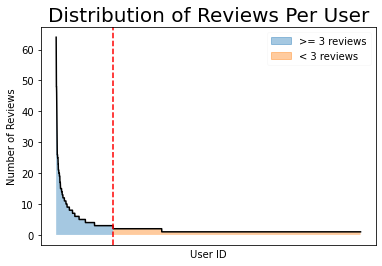

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

counts = reviews['userid'].value_counts(sort=True)
counts

counts.index = counts.index.map(str)
p = counts.plot.line(color='black')
p.axes.get_xaxis().set_ticks([])
p.set_xlabel('User ID')
p.set_ylabel('Number of Reviews')
plt.fill_between(counts.index, counts, where=counts >= 3, alpha=0.4)
plt.fill_between(counts.index, counts, where=counts < 3, alpha=0.4)
plt.axvline(x=sum(counts >= 3), linestyle='--', color='red')
plt.legend(handles=[mpatches.Patch(color='#1f77b4', alpha=0.4, label='>= 3 reviews'),
                    mpatches.Patch(color='#ff7f0e', alpha=0.4, label='< 3 reviews')],
           loc="upper right", framealpha=0.1)
plt.title('Distribution of Reviews Per User', size=20)
# plt.savefig('../Plots/long_tail.pdf', transparent=True)
plt.savefig(PATH + '../../results/plots/long_tail.png', transparent=True)
plt.show()

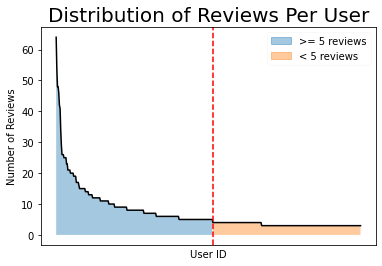

In [11]:
counts = reviews_filter['userid'].value_counts(sort=True)
counts

counts.index = counts.index.map(str)
p = counts.plot.line(color='black')
p.axes.get_xaxis().set_ticks([])
p.set_xlabel('User ID')
p.set_ylabel('Number of Reviews')
plt.fill_between(counts.index, counts, where=counts >= 5, alpha=0.4)
plt.fill_between(counts.index, counts, where=counts < 5, alpha=0.4)
plt.axvline(x=sum(counts >= 5), linestyle='--', color='red')
plt.legend(handles=[mpatches.Patch(color='#1f77b4', alpha=0.4, label='>= 5 reviews'),
                    mpatches.Patch(color='#ff7f0e', alpha=0.4, label='< 5 reviews')],
           loc="upper right", framealpha=0.1)
plt.title('Distribution of Reviews Per User', size=20)
# plt.savefig('../Plots/long_tail.pdf', transparent=True)
plt.savefig('../../results/plots/long_tail.png', transparent=True)
plt.show()